### Student Information
Name:

Student ID:

GitHub ID:

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [80]:
### Begin Assignment Here
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap
from sklearn.utils import Bunch
df = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Data Preparation

In [81]:
df.head()

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


In [82]:
df = df[['text', 'label']].copy()

In [83]:
df.head()

,text,label
0,Calls on retards,-1.0
1,Stunt as in like why did they even make a big ...,0.0
2,Seeing lots of red in the ticker.,0.0
3,Vision Marine Technologies Inc. is rewriting t...,1.0
4,He didn’t say thank you.,-1.0


In [84]:
x = df['text'].tolist() 
y = df['label'].to_numpy() 
target_names = ['negative', 'neutral', 'positive']

In [85]:
x[0:2]

['Calls on retards',
 'Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.']

In [86]:
y[0:2]

array([-1.,  0.])

In [87]:
print("\n".join(x[0].split("\n")))

Calls on retards


In [88]:
len(x)

847

 Data Transformation

In [96]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

In [104]:
X = pd.DataFrame({'text': df['text'].fillna('').astype(str)})

In [105]:
len(X)

847

In [106]:
X[0:2]

,text
0,Calls on retards
1,Stunt as in like why did they even make a big ...


In [107]:
X['label'] = df['label']

In [108]:
X['label_name'] = X['label'].map({-1:'negative', 0:'neutral', 1:'positive'})

In [109]:
X[0:10]

,text,label,label_name
0,Calls on retards,-1.0,negative
1,Stunt as in like why did they even make a big ...,0.0,neutral
2,Seeing lots of red in the ticker.,0.0,neutral
3,Vision Marine Technologies Inc. is rewriting t...,1.0,positive
4,He didn’t say thank you.,-1.0,negative
5,"Hoping to ejaculate in wet warm puss tonight, ...",0.0,neutral
6,Trump will respond to china increasing their t...,-1.0,negative
7,Confirmed not a trap. Its been like this for p...,0.0,neutral
8,Am I the only one seeing the cup & handle brea...,1.0,positive
9,HLGN is $10. Hurry and catch it now before it ...,1.0,positive


In [110]:
X[:10][["text","label_name"]]

,text,label_name
0,Calls on retards,negative
1,Stunt as in like why did they even make a big ...,neutral
2,Seeing lots of red in the ticker.,neutral
3,Vision Marine Technologies Inc. is rewriting t...,positive
4,He didn’t say thank you.,negative
5,"Hoping to ejaculate in wet warm puss tonight, ...",neutral
6,Trump will respond to china increasing their t...,negative
7,Confirmed not a trap. Its been like this for p...,neutral
8,Am I the only one seeing the cup & handle brea...,positive
9,HLGN is $10. Hurry and catch it now before it ...,positive


In [111]:
X[-10:]

,text,label,label_name
837,Finance media lying \r\n\r\n*Surprise*,-1.0,negative
838,I am all in,0.0,neutral
839,The Art of the Deal…,0.0,neutral
840,Lol fr,0.0,neutral
841,So countries “begging to stop the tariffs” and...,1.0,positive
842,Invest now it is going to shoot up tomorrow,1.0,positive
843,Where can I read this?,0.0,neutral
844,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",0.0,neutral
845,i sold my puts so i expect cheeto to declare w...,-1.0,negative
846,![img](emote|t5_2th52|31224),0.0,neutral


In [112]:
X.loc[:10, 'text']

0                                      Calls on retards
1     Stunt as in like why did they even make a big ...
2                     Seeing lots of red in the ticker.
3     Vision Marine Technologies Inc. is rewriting t...
4                              He didn’t say thank you.
5     Hoping to ejaculate in wet warm puss tonight, ...
6     Trump will respond to china increasing their t...
7     Confirmed not a trap. Its been like this for p...
8     Am I the only one seeing the cup & handle brea...
9     HLGN is $10. Hurry and catch it now before it ...
10         It's a copy/paste from a Bloomberg terminal.
Name: text, dtype: object

In [113]:
X[X["label_name"]=="positive"][::10][0:5]

,text,label,label_name
3,Vision Marine Technologies Inc. is rewriting t...,1.0,positive
78,I think it’s gonna work itself out. I bought t...,1.0,positive
168,The obvious can also be refreshing from CNBC: ...,1.0,positive
219,Same. Back to break even after that last rip b...,1.0,positive
319,Etrade has a feed of news articles about how r...,1.0,positive


 Missing Values

In [114]:
X.isnull()

,text,label,label_name
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
842,False,False,False
843,False,False,False
844,False,False,False
845,False,False,False


In [115]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,label,label_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [116]:
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

In [95]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,label,label_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


Duplicate Data

In [117]:
X.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
842    False
843    False
844     True
845    False
846    False
Length: 847, dtype: bool

In [118]:
sum(X.duplicated())

23

In [120]:
sum(X.duplicated('text'))

23

In [121]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [122]:
len(X)

813

Sampling

In [123]:
X_sample = X.sample(n=360)

In [124]:
len(X_sample)

360

In [125]:
X_sample[0:4]

,text,label,label_name
549,CGC,0.0,neutral
108,Carryover indefinitely for life of taxpayer,0.0,neutral
398,How this Friday pumped is beyond me.,0.0,neutral
621,Will it go up,0.0,neutral


In [126]:
import matplotlib.pyplot as plt
%matplotlib inline

label_name
neutral     391
negative    315
positive    107
Name: count, dtype: int64


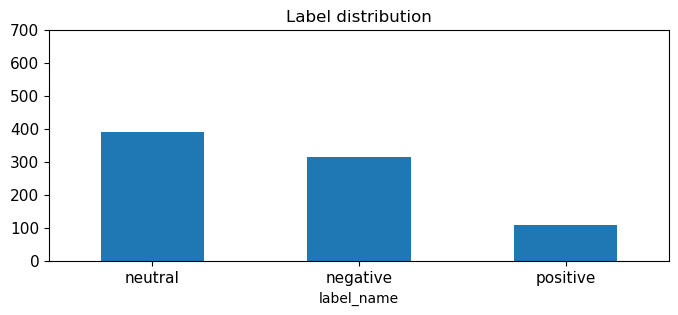

In [127]:
print(X.label_name.value_counts())
X.label_name.value_counts().plot(kind = 'bar',
                                    title = 'Label distribution',
                                    ylim = [0, 700],        
                                    rot = 0, fontsize = 11, figsize = (8,3))
import matplotlib.pyplot as plt
plt.show()

label_name
neutral     171
negative    137
positive     52
Name: count, dtype: int64


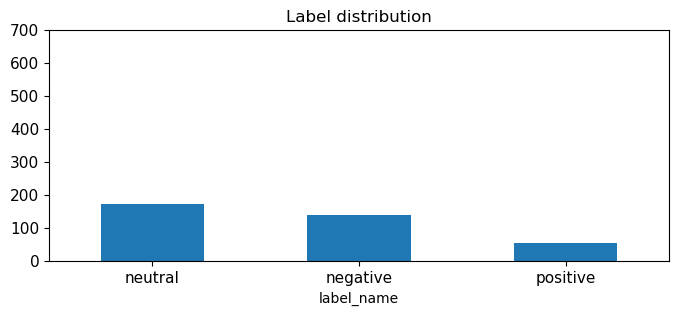

In [128]:
print(X_sample.label_name.value_counts())
X_sample.label_name.value_counts().plot(kind = 'bar',
                                    title = 'Label distribution',
                                    ylim = [0, 700],        
                                    rot = 0, fontsize = 11, figsize = (8,3))
import matplotlib.pyplot as plt
plt.show()

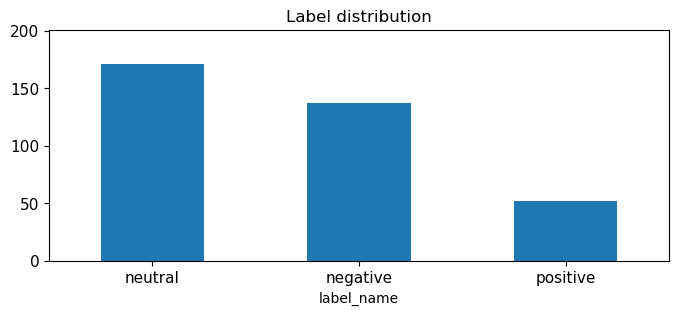

In [129]:
X_sample.label_name.value_counts().plot(kind = 'bar',
                                    title = 'Label distribution',
                                    ylim = [0, X_sample.label_name.value_counts().max()+30],        
                                    rot = 0, fontsize = 11, figsize = (8,3))
import matplotlib.pyplot as plt
plt.show()

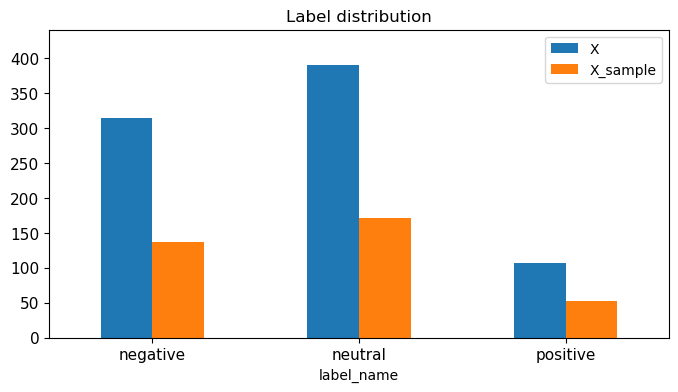

In [130]:
counts_X = X['label_name'].value_counts().sort_index()
counts_sample = X_sample['label_name'].value_counts().sort_index()
pd.DataFrame({'X': counts_X, 'X_sample': counts_sample}).plot(
    kind='bar',
    figsize=(8,4),
    title='Label distribution',
    ylim=[0, max(counts_X.max(), counts_sample.max()) + 50],
    rot=0,
    fontsize=11,
)
plt.show()

Feature Creation

In [131]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [132]:
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [133]:
X[0:4]["unigrams"]

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
Name: unigrams, dtype: object

In [134]:
X[0:4]

,text,label,label_name,unigrams
0,Calls on retards,-1.0,negative,"[Calls, on, retards]"
1,Stunt as in like why did they even make a big ...,0.0,neutral,"[Stunt, as, in, like, why, did, they, even, ma..."
2,Seeing lots of red in the ticker.,0.0,neutral,"[Seeing, lots, of, red, in, the, ticker, .]"
3,Vision Marine Technologies Inc. is rewriting t...,1.0,positive,"[Vision, Marine, Technologies, Inc., is, rewri..."


In [135]:
list(X[0:1]['unigrams'])

[['Calls', 'on', 'retards']]

Feature subset selection

In [136]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3 stored elements and shape (1, 4313)>
  Coords	Values
  (0, 689)	1
  (0, 2682)	1
  (0, 3220)	1


In [137]:
count_vect.get_feature_names_out()[887]

'complain'

In [138]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

In [139]:
analyze(X.text[0])

['calls', 'on', 'retards']

In [140]:
analyze(X.text[1])

['stunt',
 'as',
 'in',
 'like',
 'why',
 'did',
 'they',
 'even',
 'make',
 'big',
 'deal',
 'about',
 'starting',
 'it',
 'in',
 'the',
 'first',
 'place',
 'no',
 'company',
 'should',
 'ever',
 'talk',
 'about',
 'politics',
 'ever']

In [141]:
X_counts.shape

(813, 4313)

In [142]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [143]:
X_counts.shape

(813, 4313)

In [144]:
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [145]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

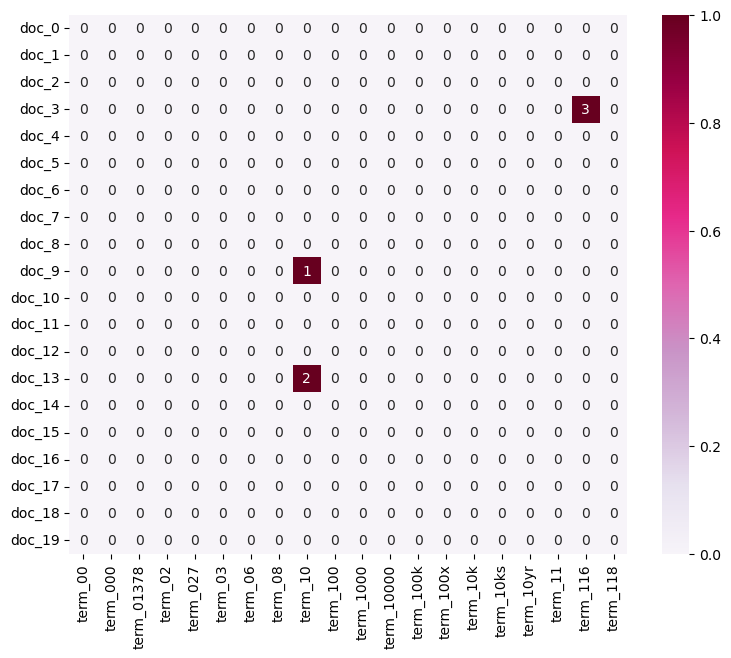

In [146]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)
plt.show()

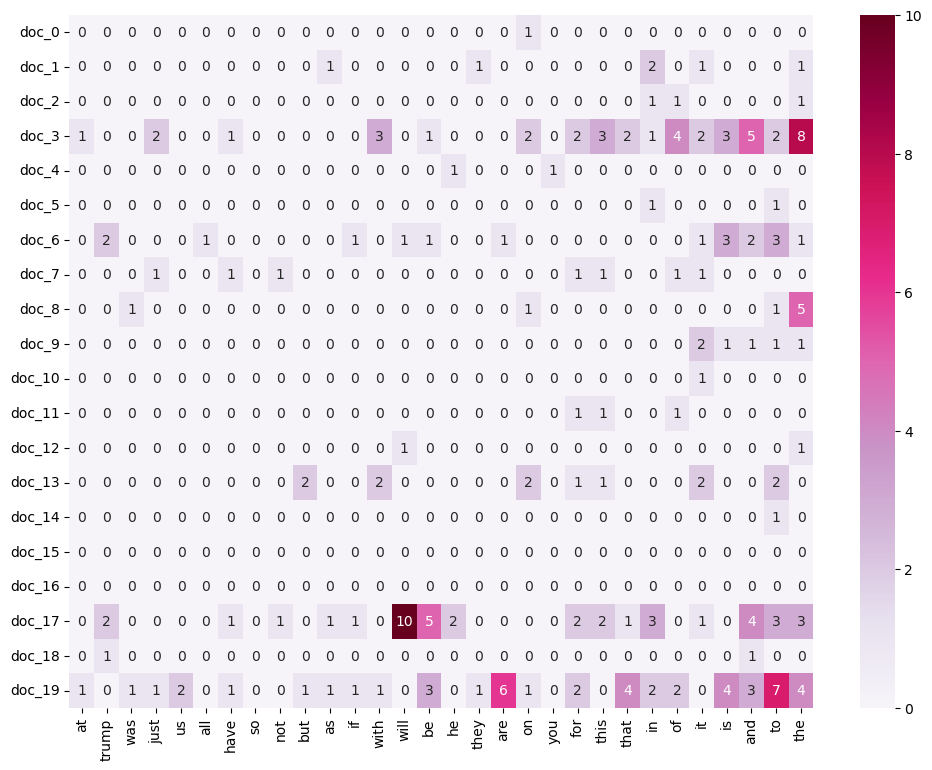

In [147]:
# Answer here
#找出出現頻率最高的30個詞彙
term_freq = np.asarray(X_counts.sum(axis=0)).ravel()
top_term_idx = np.argsort(term_freq)[-30:]

#更改下plot_x，由於plot_y是文件，因此不用改
plot_x = [count_vect.get_feature_names_out()[i] for i in top_term_idx]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, top_term_idx].toarray()
#後面基本一樣
df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
plt.subplots(figsize=(12, 9))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=plot_z.max(), annot=True)
plt.show()

Transform Text Data

In [148]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [149]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [150]:
term_frequencies[0]

np.int64(4)

C:\Users\User\AppData\Local\Temp\ipykernel_29332\1333869150.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


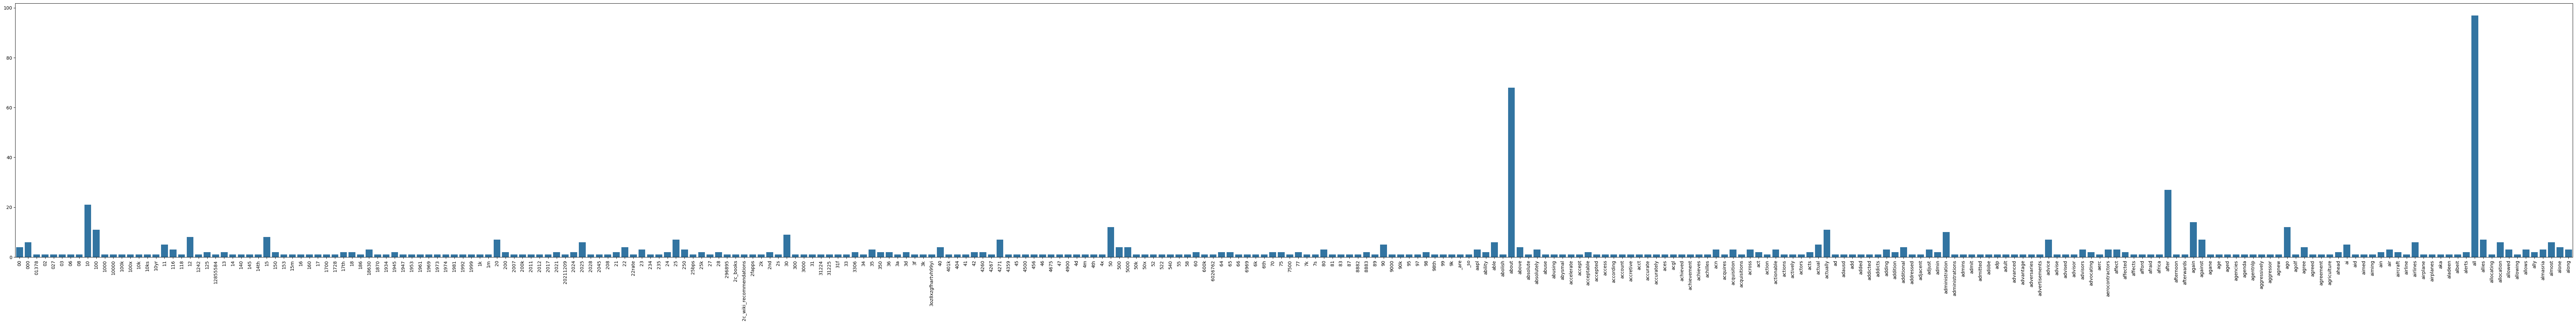

In [151]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300]) 
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_29332\240477828.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


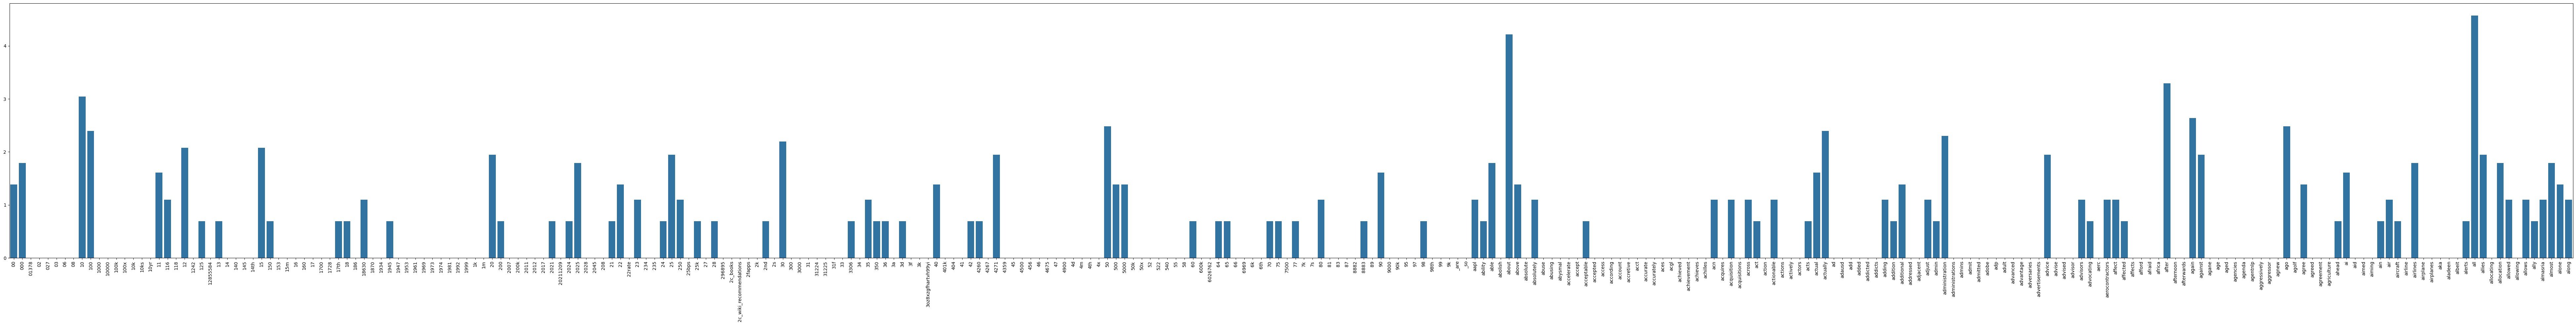

In [152]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_29332\979900119.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(top_terms, rotation=90)


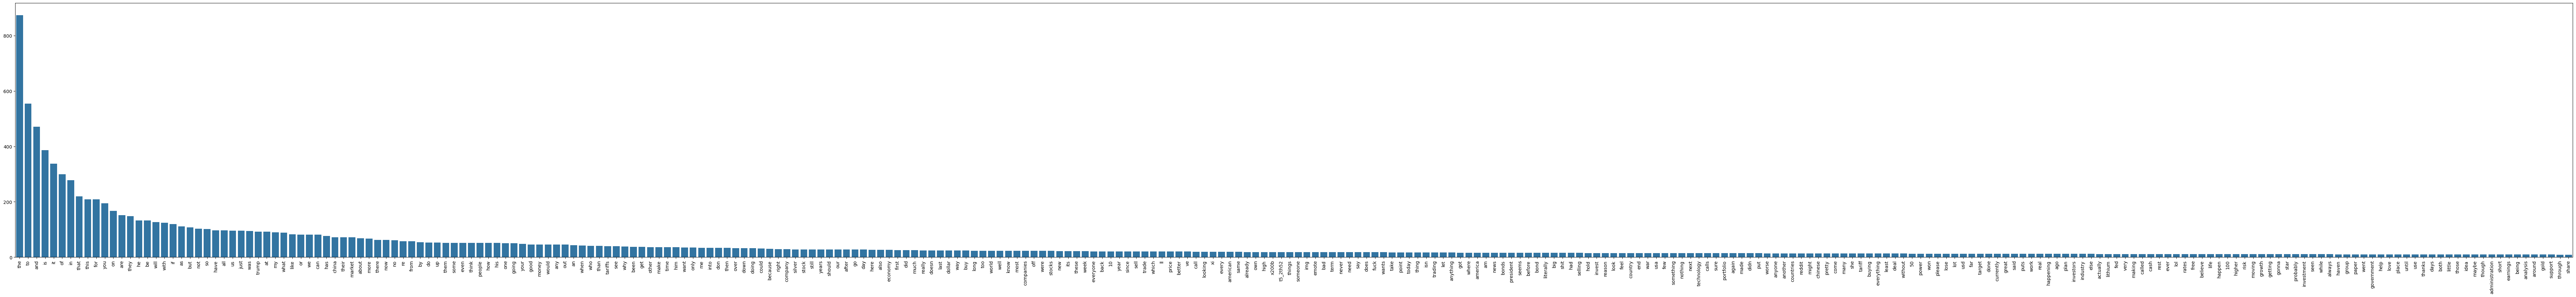

In [153]:
plt.subplots(figsize=(100, 10))
top_n = 300
top_idx = np.argsort(term_frequencies)[-top_n:][::-1]  # 我查到的是，argsort會讓資料從頻率小排到大，如果要讓圖呈現大排到小，後面得加[::-1] 


top_terms = count_vect.get_feature_names_out()[top_idx]
top_freqs = term_frequencies[top_idx]

g = sns.barplot(x=top_terms, y=top_freqs)
g.set_xticklabels(top_terms, rotation=90)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_29332\1569087428.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(top_terms, rotation=90)


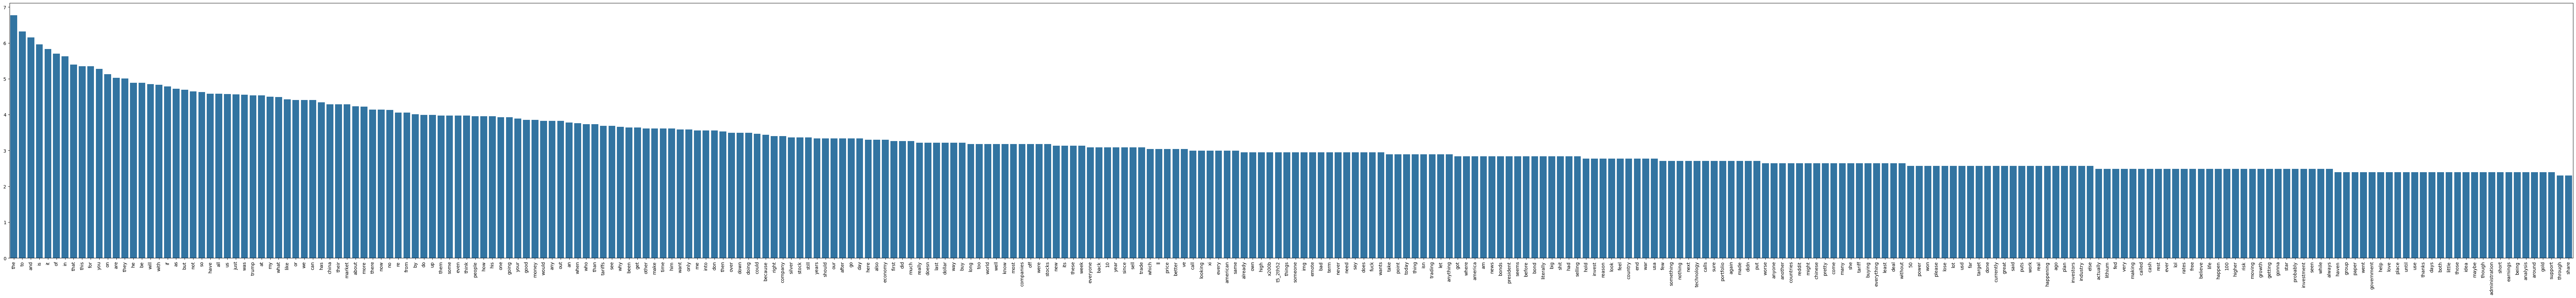

In [154]:
plt.subplots(figsize=(100, 10))
top_n = 300
top_idx = np.argsort(term_frequencies)[-top_n:][::-1]
top_terms = count_vect.get_feature_names_out()[top_idx]
top_freqs = term_frequencies[top_idx]

top_freqs_log = np.log1p(top_freqs) #取log

g = sns.barplot(x=top_terms, y=top_freqs_log)
g.set_xticklabels(top_terms, rotation=90)
plt.show()

# Phase 2

In [ ]:
### Begin Assignment Here